# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Samuel Otisi</h2> 

# Data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [6]:
# Describe our data for each feature and use .info() for get information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3333 non-null float64
dtypes: float64(5), int64(6)
memory usage: 286.5 KB


In [7]:
# Analyse missing values
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


# Exploratory Data Analysis

In [32]:
# data features without the labels
data_feat = data.drop('Churn', axis=1)
data_feat

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [33]:
# check for colinearity
corr = data_feat.corr()
corr

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
AccountWeeks,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023
RoamMins,0.009514,-0.045871,-0.001318,0.162746,-0.009640,-0.010155,0.021565,0.117433,-0.011023,1.000000


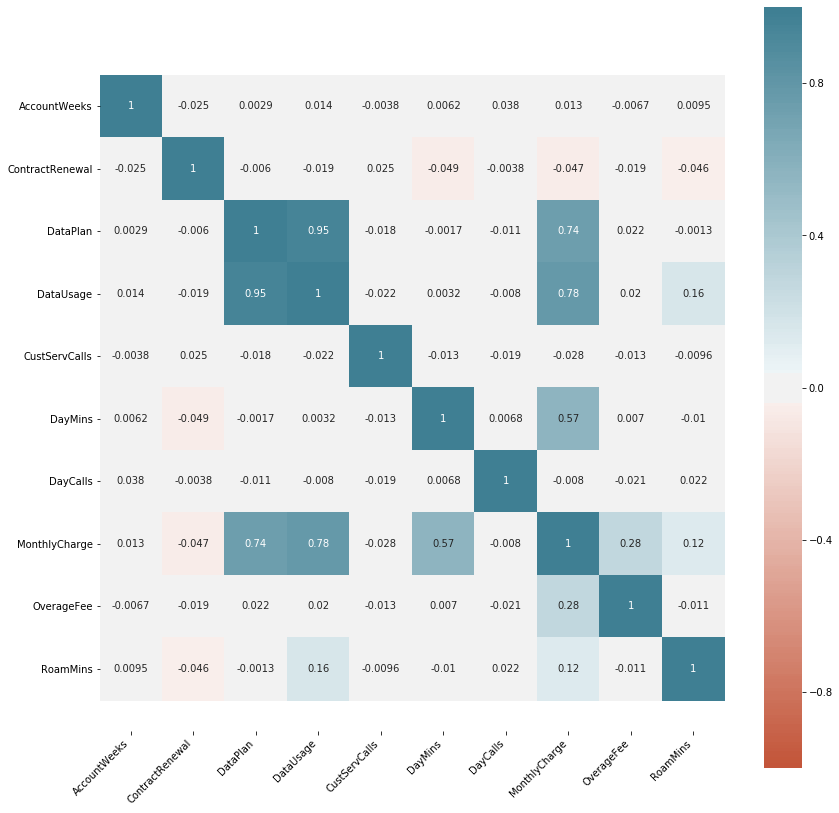

In [34]:
# Correlation of the features

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

##### `DataPlan`, `DataUsage` and `Monthlycharge` are highly correlated

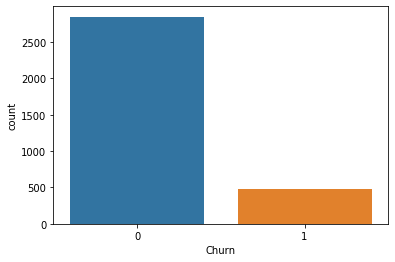

In [26]:
# Our label Distribution (countplot)
sns.countplot(data['Churn'])

In [27]:
data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

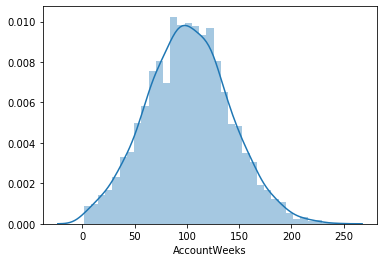

In [30]:
# Example EDA
sns.distplot(data['AccountWeeks'])

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [35]:
# total length of the observations 
len(data)

3333

In [39]:
len(data['AccountWeeks'].unique())

212

In [45]:
# counts the proportion of the label classes
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [55]:
data_feat.nunique()
# this shows the presence of duplicate values in almost all the features

AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

In [56]:
data_feat['AccountWeeks'].duplicated().value_counts()
# this feature has only `212` unique values and `3121` duplicate values

True     3121
False     212
Name: AccountWeeks, dtype: int64

In [57]:
# there is a need for feature scaling since the features have different values scales 
# and this will affect the model performance
data_feat

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


The `colinearity` in the feature matrix will demand getting new features and thus remove the feature that are highly correlated with each other, such features are `DataPlan`, `dataUsage` and `monthlyCharge`. i will be using ColumnTransformer, Pipeline, PolynomialFeatures, truncatedSVD, and standardscaler to tranform the data by generating new features.

In [59]:
# importing  the necessary modules
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [64]:
col_features = list(data_feat.columns)

features = ColumnTransformer([
    ('poly', PolynomialFeatures(), col_features)
])

pipe = Pipeline([
    ('features', features),
    ('reduction', TruncatedSVD(n_components=30)),
    ('scale', StandardScaler())
])

In [66]:
X = pipe.fit_transform(data_feat)
X

array([[ 1.99599956, -0.56868121,  0.86413239, ..., -0.01637977,
        -0.48497794, -1.70916021],
       [-0.16931749,  0.5005866 , -1.08076599, ..., -0.08632831,
         0.26908489,  1.25785988],
       [ 1.4446477 ,  0.03358262,  0.69977497, ..., -0.27722901,
         1.42341595, -0.39245701],
       ...,
       [-0.48014559, -1.03691402, -1.22802925, ..., -0.09490117,
         0.1217624 ,  0.88551099],
       [ 1.13617658,  1.57093565,  1.62204251, ..., -3.37055019,
        -1.81004528, -1.47011439],
       [ 0.95667567, -1.16917346, -0.63313616, ...,  0.30974826,
        -1.1018132 , -0.33199417]])

In [69]:
y = data[['Churn']].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [75]:
# now performing a train_test split on the features and the label
from sklearn.model_selection import train_test_split, cross_validate

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [73]:
# models importation

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [74]:
# metric evaluation importation

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix

In [80]:
# models definition

l_model = LogisticRegression(solver='lbfgs')
d_model = DecisionTreeClassifier(max_depth=3, min_samples_split=6)

# import the following Randomforestclassifier will help the imbalanced dataset class we have
# later on in the project, i will try using the GradientboostClassifier
rf_model = RandomForestClassifier(n_estimators=20, random_state=0)

In [83]:
# fitting the linear model

l_model.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
# fitting the decisionTreeClassifier

d_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [85]:
# fitting the RndomforestClassifierabs

rf_model.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [86]:
# evaluating the linear model

print(l_model.score(X_train, y_train))
print(l_model.score(X_test, y_test))

0.8859837119588513
0.894


In [87]:
# evaluating the decision tree model

print(d_model.score(X_train, y_train))
print(d_model.score(X_test, y_test))

0.8838405486498071
0.87


In [88]:
# evaluating the random forest model

print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

0.9957136733819117
0.913


In [89]:
# Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score for linear model

print(classification_report(y_test, l_model.predict(X_test)))

print("Accuracy:",accuracy_score(y_test,l_model.predict(X_test)))
print("Precision:",precision_score(y_test,l_model.predict(X_test)))
print("Recall:",recall_score(y_test,l_model.predict(X_test)))
print("F1 Score:",f1_score(y_test,l_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       857
           1       0.74      0.40      0.52       143

    accuracy                           0.89      1000
   macro avg       0.82      0.69      0.73      1000
weighted avg       0.88      0.89      0.88      1000

Accuracy: 0.894
Precision: 0.7402597402597403
Recall: 0.3986013986013986
F1 Score: 0.5181818181818181


In [90]:
# Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score for DecionTree model

print(classification_report(y_test, d_model.predict(X_test)))

print("Accuracy:",accuracy_score(y_test,d_model.predict(X_test)))
print("Precision:",precision_score(y_test,d_model.predict(X_test)))
print("Recall:",recall_score(y_test,d_model.predict(X_test)))
print("F1 Score:",f1_score(y_test,d_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.66      0.19      0.29       143

    accuracy                           0.87      1000
   macro avg       0.77      0.59      0.61      1000
weighted avg       0.85      0.87      0.84      1000

Accuracy: 0.87
Precision: 0.6585365853658537
Recall: 0.1888111888111888
F1 Score: 0.2934782608695652


In [91]:
# Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score for RandomForest model

print(classification_report(y_test, rf_model.predict(X_test)))

print("Accuracy:",accuracy_score(y_test,rf_model.predict(X_test)))
print("Precision:",precision_score(y_test,rf_model.predict(X_test)))
print("Recall:",recall_score(y_test,rf_model.predict(X_test)))
print("F1 Score:",f1_score(y_test,rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       857
           1       0.84      0.48      0.61       143

    accuracy                           0.91      1000
   macro avg       0.88      0.73      0.78      1000
weighted avg       0.91      0.91      0.90      1000

Accuracy: 0.913
Precision: 0.8414634146341463
Recall: 0.4825174825174825
F1 Score: 0.6133333333333333


### overfiting-Underfitting Analysis

1. for the logisticRegression and the DecisionTree model there was no overfitting since the difference between the R^2 score of the training and the testing data sets is not significant, also there was underfitting since the R^2 of the test data set is greater than that of the training set.
1. but for the Randomforest model the data was a little bit overfitted since the variance between the scores are kind of much.

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

In [109]:
# before selecting the best model, i will be working on the high variance using the GridSearchcv
# importing the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
tree = RandomForestClassifier(n_estimators=20, random_state=0)
param_grid = {'max_depth': range(2, 10), 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': range(2,100,2)}
grid_search = GridSearchCV(tree, param_grid, cv=2, n_jobs=-1, verbose=1, iid=True)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 1960 candidates, totalling 3920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3920 out of 3920 | elapsed:  4.1min finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid=True, n_jobs=-1,
             param_grid={'max_depth

In [104]:
best_params = grid_search.best_params_

In [105]:
best_params

{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [106]:
# training score

grid_search.score(X_train, y_train)

0.9451350192884698

In [107]:
# testing score
grid_search.score(X_test, y_test)

0.907

In [118]:
# this is the confusion matrix
print(confusion_matrix(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       857
           1       0.92      0.38      0.54       143

    accuracy                           0.91      1000
   macro avg       0.91      0.69      0.75      1000
weighted avg       0.91      0.91      0.89      1000

[[852   5]
 [ 88  55]]


In [140]:
 # Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score for GridSearched RandomForest model

print(classification_report(y_test, grid_search.predict(X_test)))

print("Accuracy:",accuracy_score(y_test, grid_search.predict(X_test)))
print("Precision:",precision_score(y_test, grid_search.predict(X_test)))
print("Recall:",recall_score(y_test, grid_search.predict(X_test)))
print("F1 Score:",f1_score(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       857
           1       0.92      0.38      0.54       143

    accuracy                           0.91      1000
   macro avg       0.91      0.69      0.75      1000
weighted avg       0.91      0.91      0.89      1000

Accuracy: 0.907
Precision: 0.9166666666666666
Recall: 0.38461538461538464
F1 Score: 0.541871921182266


In [141]:
# trying out with GradientBooosting model

rgr = GradientBoostingClassifier(n_estimators=20)
param_grid = {'max_depth': range(1, 20), 
              'min_samples_leaf': range(2,100,2),
              'min_samples_split': [2, 4, 6, 8, 10]}
gradient_boosting = GridSearchCV(rgr, param_grid, cv=2, n_jobs=-1, verbose=1, iid=True)
gradient_boosting.fit(X_train, y_train)

Fitting 2 folds for each of 4655 candidates, totalling 9310 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 9310 out of 9310 | elapsed: 30.8min finished
C:\Users\user\Anaconda3\lib\site-pac

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=20,
                                                  n_iter_no_change=None,
                                                  presort='

In [142]:
gradient_boosting.best_params_

{'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 8}

In [143]:
print(gradient_boosting.score(X_train, y_train))
print(gradient_boosting.score(X_test, y_test))

0.9635662237462495
0.909


In [144]:
confusion_matrix(y_test, gradient_boosting.predict(X_test))

array([[842,  15],
       [ 76,  67]], dtype=int64)

In [145]:
# Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score for GradientBoosting model

print(classification_report(y_test, gradient_boosting.predict(X_test)))

print("Accuracy:",accuracy_score(y_test, gradient_boosting.predict(X_test)))
print("Precision:",precision_score(y_test, gradient_boosting.predict(X_test)))
print("Recall:",recall_score(y_test, gradient_boosting.predict(X_test)))
print("F1 Score:",f1_score(y_test, gradient_boosting.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       857
           1       0.82      0.47      0.60       143

    accuracy                           0.91      1000
   macro avg       0.87      0.73      0.77      1000
weighted avg       0.90      0.91      0.90      1000

Accuracy: 0.909
Precision: 0.8170731707317073
Recall: 0.46853146853146854
F1 Score: 0.5955555555555555


### Best model
from the nature of the dataset, the label class distribution is unbalanced and this will affect the models evaluations, and because of the above reason the best models to handle this problem are the `ensemble models` specifically the `GradientBoostingClassifier`.

### Result Analysis

Accuracy score is the best metriic for evaluating a highly unbalaced dataset classes, and from the results obtained from all the models, they seem to possess a high accuracy score although the ensemble models have the highest scores.

since Precision and recall measures how the `actual Negative` and `actual Positive` classes have been classified correctly, and from the results obtained the ensemble models performed best.

Lastly the f1_score shows how balanced the precision_recall values that are obtained from each model, knowning the existence of the precision-recall trade-off. it is impossible to obtain a high precision and recall at the same parameter tuning.